In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


In [3]:
# Load the dataset
df = pd.read_csv("phising.csv")

# Display dataset shape and sample data
print(df.shape)
print(df['Abnormal_URL'].value_counts())
display(df.head())

(11055, 32)
Abnormal_URL
 1    9426
-1    1629
Name: count, dtype: int64


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
# Drop the 'index' column if exists
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)

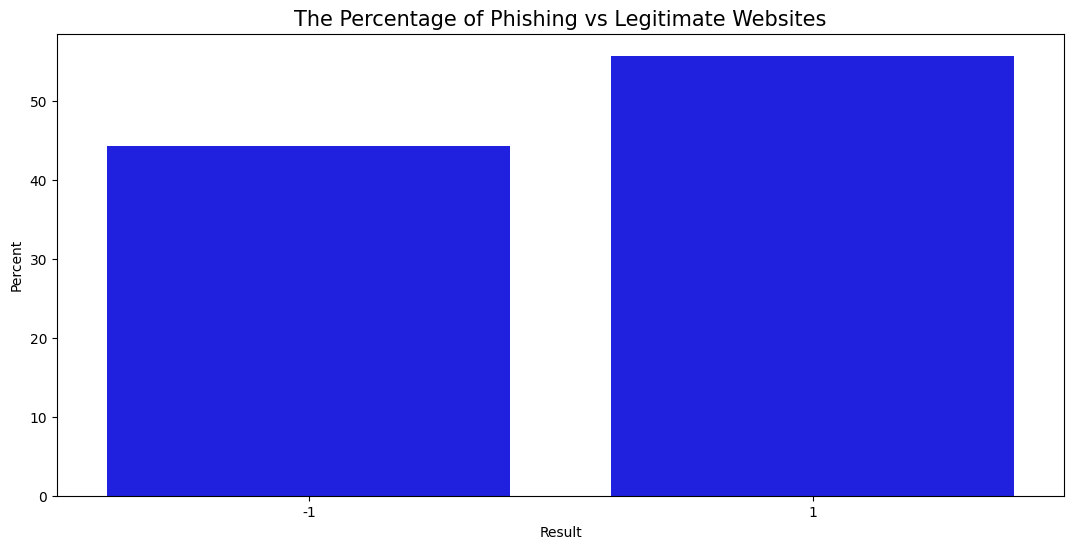

In [5]:
# Plot the percentage of phishing vs legitimate websites
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="Result", y="Result", data=df, estimator=lambda x: len(x) / len(df) * 100, color='Blue')
ax.set(ylabel="Percent")
ax.set_title('The Percentage of Phishing vs Legitimate Websites', size=15)
plt.show()


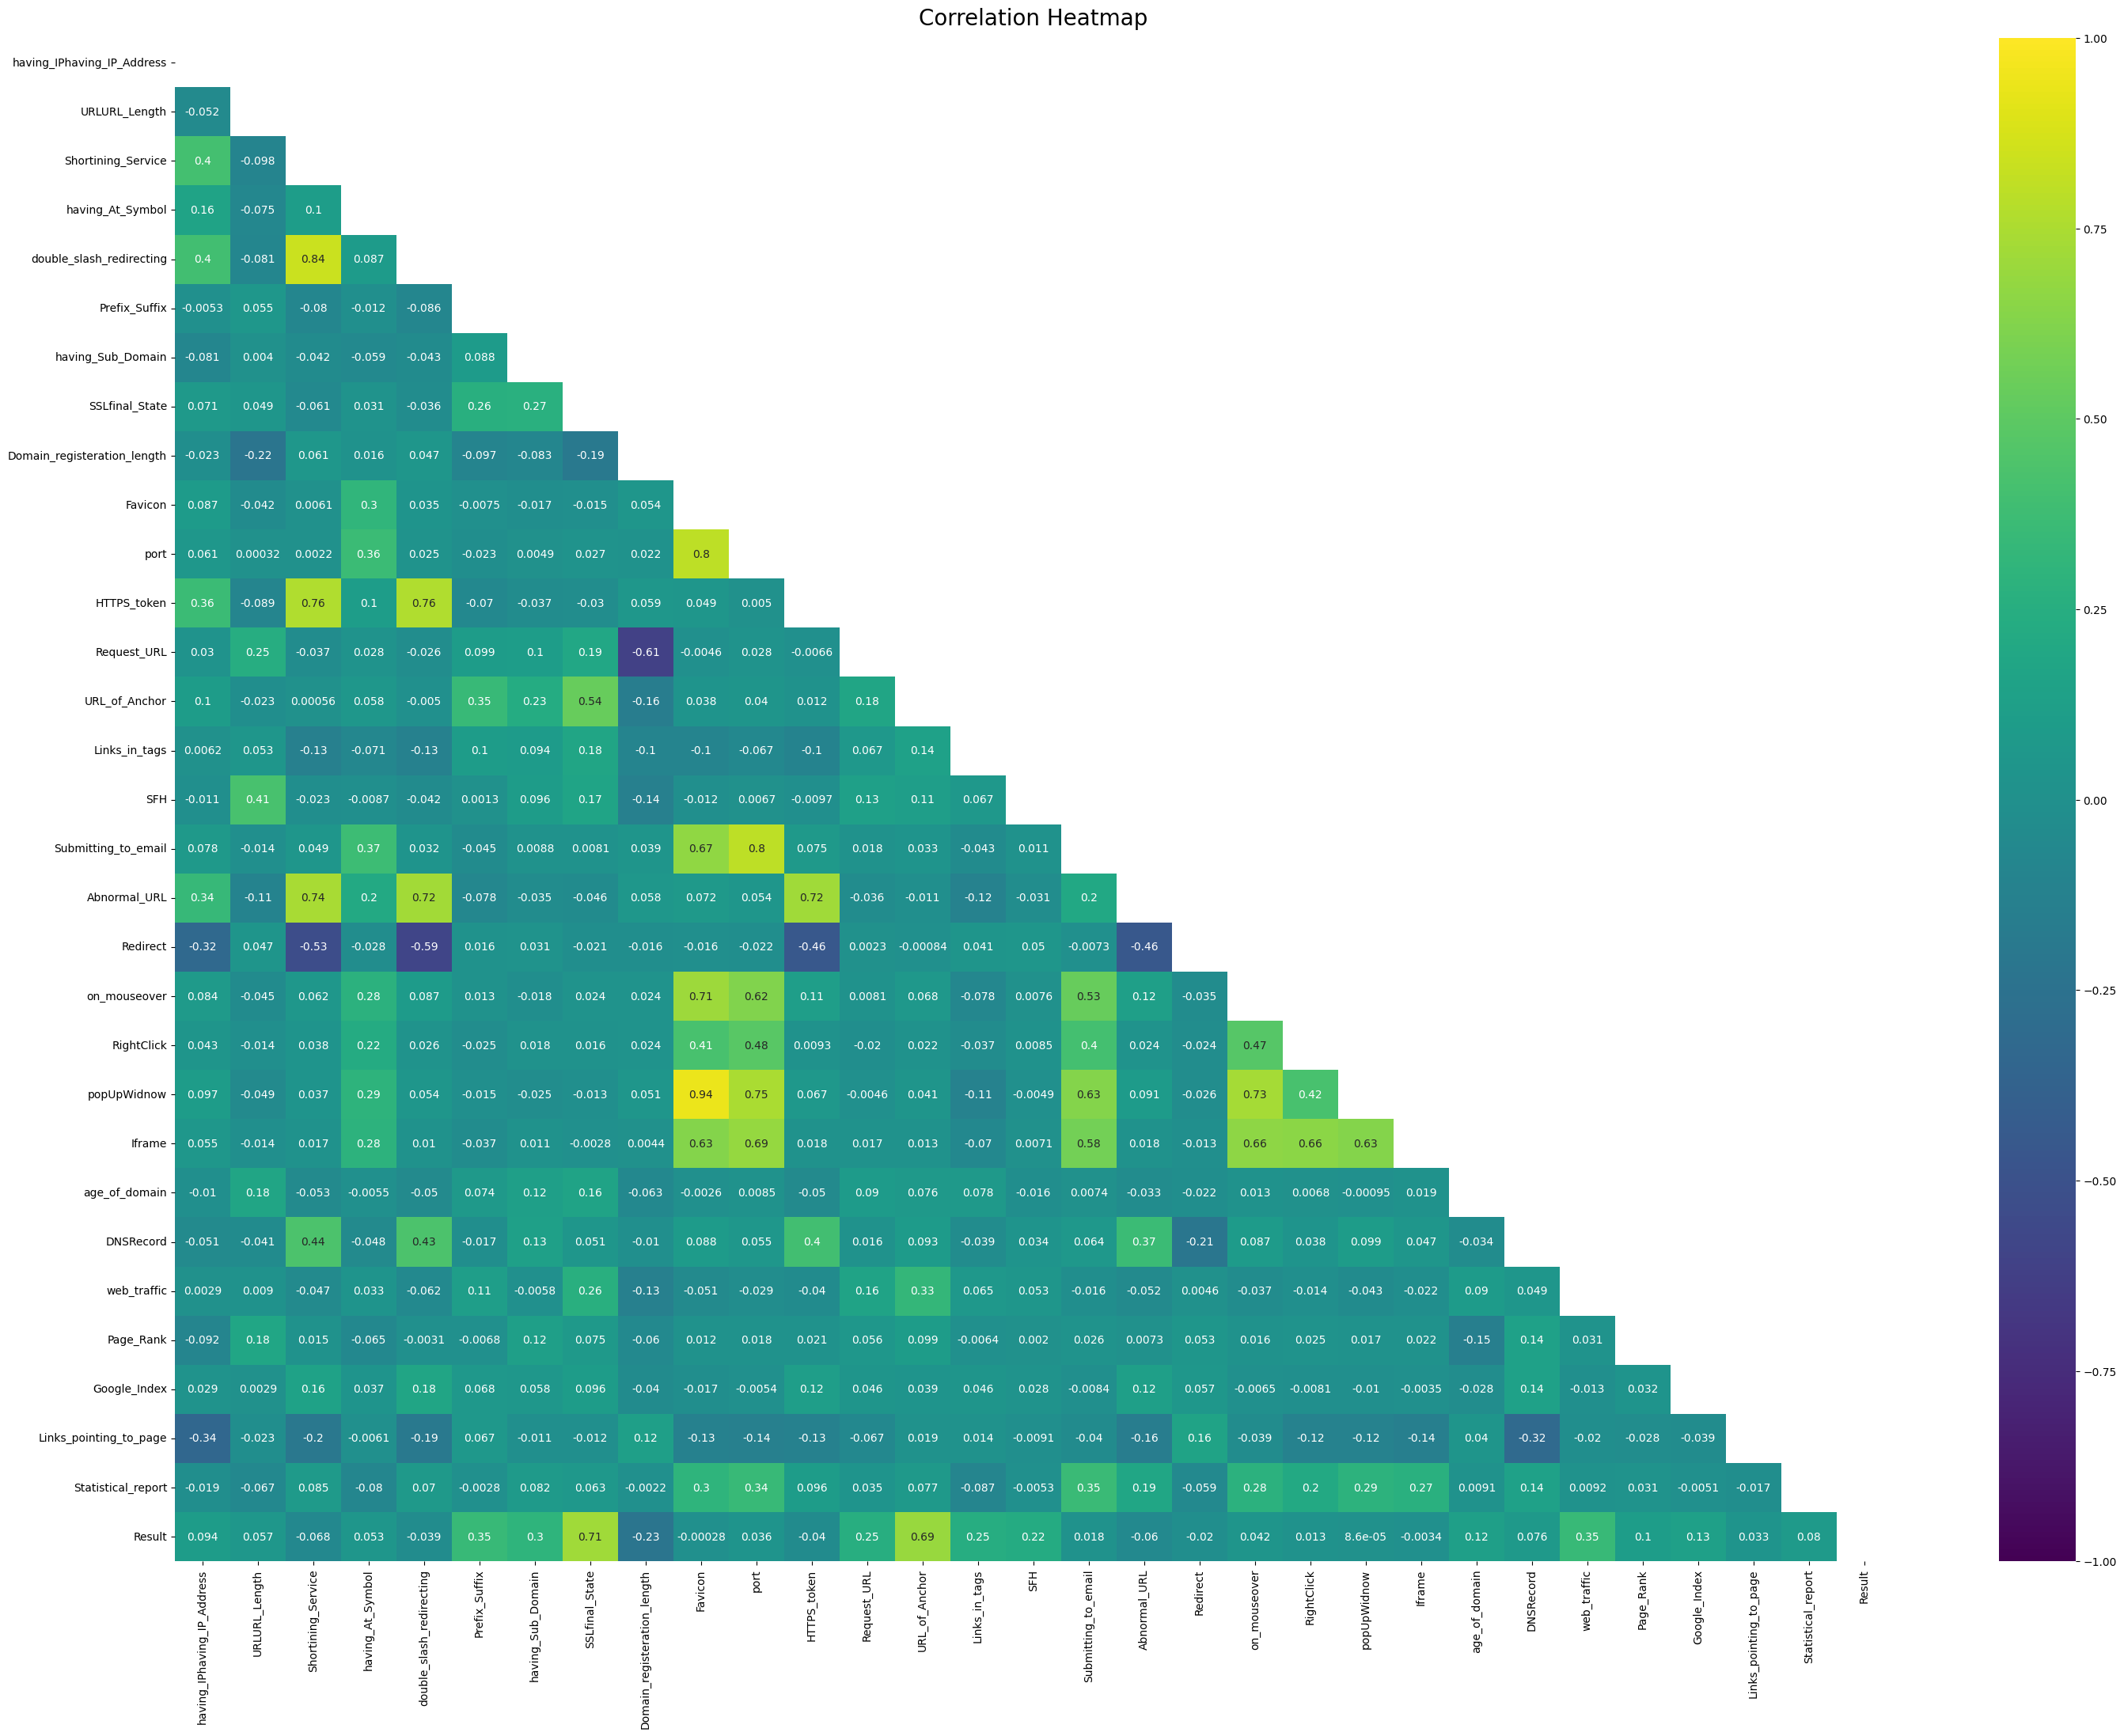

In [6]:
# Plot the correlation heatmap
plt.figure(figsize=(35, 25))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)
plt.show()

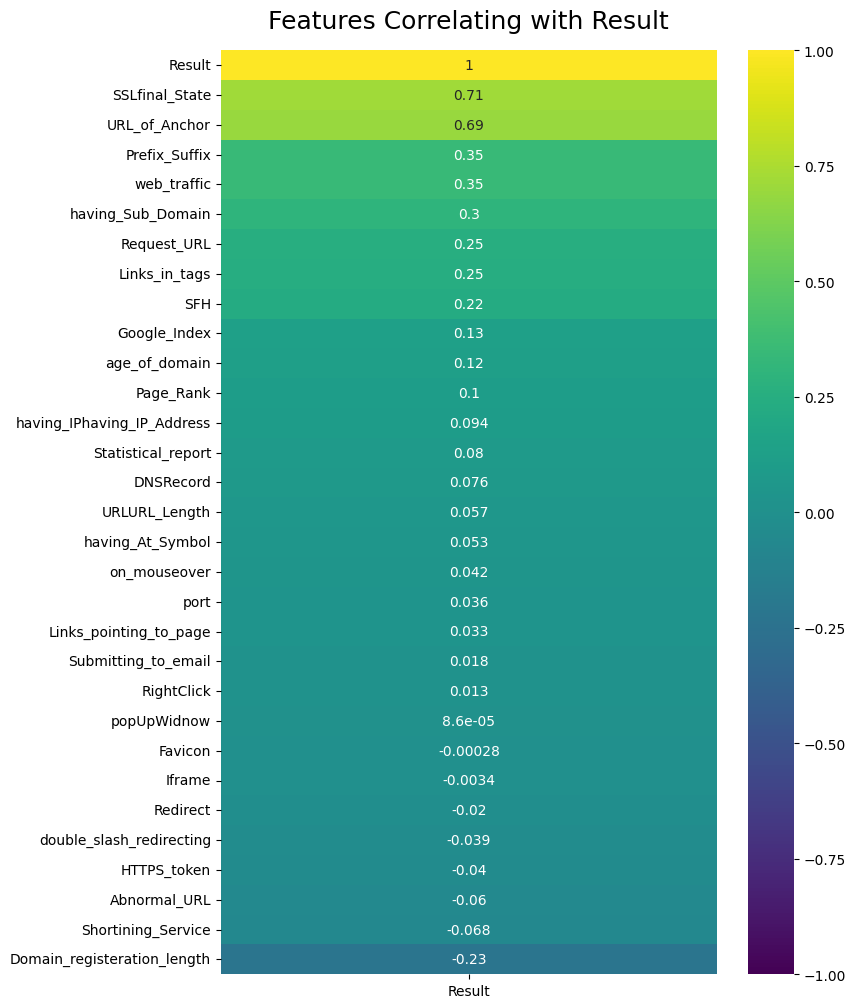

In [7]:
# Plot the features correlating with the result
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16)
plt.show()

In [8]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Set the parameters for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

In [1]:
# Initialize the SVM model
svm_model = SVC(random_state=42)


NameError: name 'SVC' is not defined

In [12]:
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [13]:
# Initialize the SVM model with the best parameters
best_svm_model = SVC(**best_params, random_state=42)

# Train the model
best_svm_model.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Evaluate the model
print("SVM Model Training Score: ", best_svm_model.score(X_train, y_train))
print("SVM Model Testing Score: ", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

SVM Model Training Score:  0.9909532811234134
SVM Model Testing Score:  0.9643738010413812

              precision    recall  f1-score   support

  Legitimate       0.97      0.95      0.96      1565
    Phishing       0.96      0.98      0.97      2084

    accuracy                           0.96      3649
   macro avg       0.96      0.96      0.96      3649
weighted avg       0.96      0.96      0.96      3649



In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

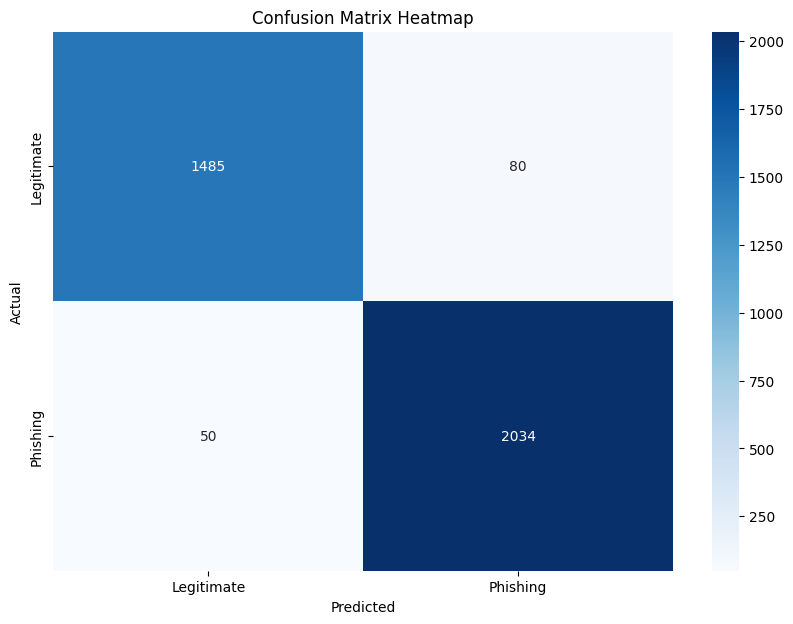

In [15]:
# Plotting the confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [16]:
# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

<Figure size 1200x600 with 0 Axes>

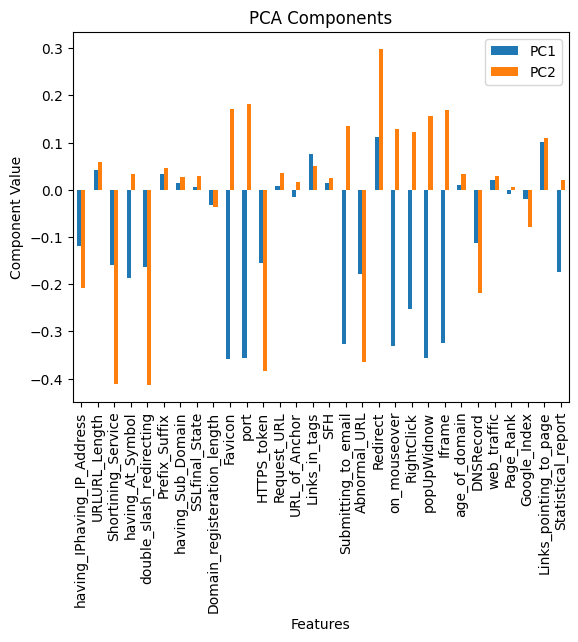

In [17]:
# Print PCA components to understand the identity of PC1 and PC2
components_df = pd.DataFrame(pca.components_, columns=df.columns[:-1], index=['PC1', 'PC2'])

# Plot PCA components
plt.figure(figsize=(12, 6))
components_df.T.plot(kind='bar')
plt.title('PCA Components')
plt.xlabel('Features')
plt.ylabel('Component Value')
plt.show()

In [19]:
# Train SVM on the reduced data
best_svm_model_pca = SVC(**best_params, random_state=42)
best_svm_model_pca.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.1, random_state=42)

Text(0, 0.5, 'Principal Component 2')

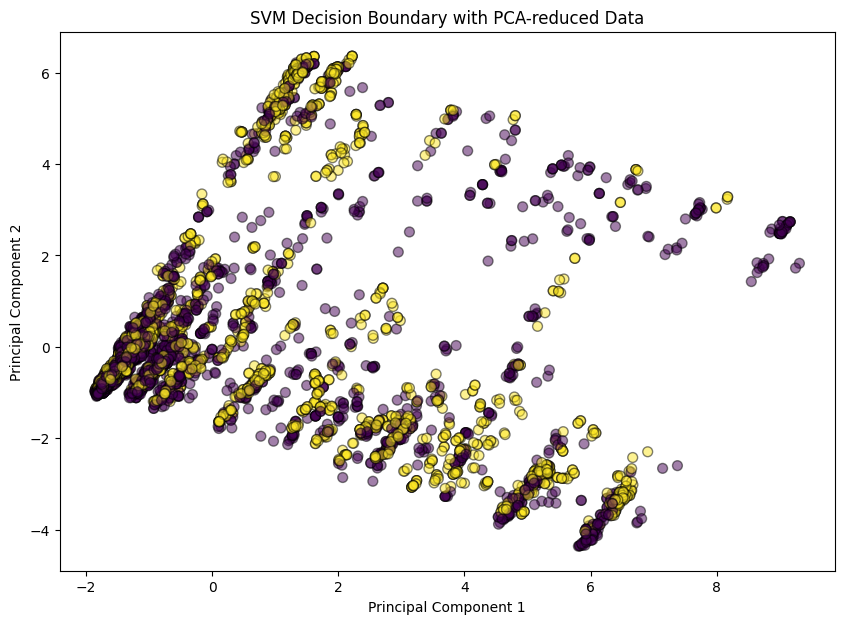

In [20]:
# Plot decision boundary
plt.figure(figsize=(10, 7))

# Plot training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.5, edgecolors='k', label='Train')
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [21]:
# Create mesh to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

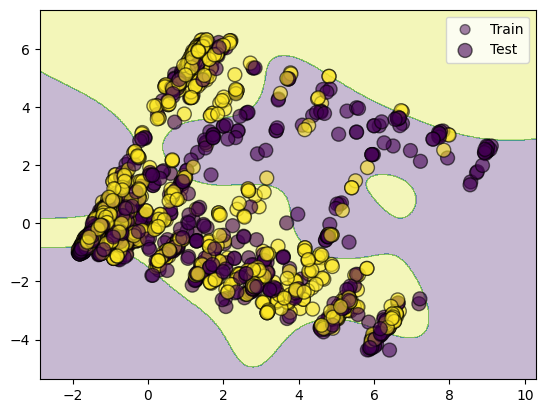

In [28]:
# Plot also the test points
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
scatter2 = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', s=100, edgecolors='k', alpha=0.6, label='Test')
# Add legend
plt.legend(handles=[scatter, scatter2], labels=['Train', 'Test'])

plt.show()